<a href="https://colab.research.google.com/github/sssiyam-sudo/MasterThesisWork/blob/main/zScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the necessary libraries & packages.

In [ ]:
import networkx as nx
import os
import pandas as pd
import numpy as np
import math
from math import sqrt
import scipy.stats
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing 

!pip install pingouin
import pingouin as pg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=f82ac01f10c143347079406eb6415caebf8417b1eba80a537288784c7e73d568
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ThesisWork/nsclc_pd1_msk_2018_clinical_data.tsv', sep='\t')

#-----------------
#-----------------
#-----------------

-------------------------------------
## **Data exploration and cleaning.**
-------------------------------------

In [ ]:
df.head()

,Study ID,Patient ID,Sample ID,Diagnosis Age,Cancer Type,Cancer Type Detailed,Durable Clinical Benefit,FGA,Fraction Genome Altered,Gene Panel,...,Oncotree Code,PD-L1 Score (%),Progress Free Survival (Months),Progression Free Status,Number of Samples Per Patient,Sex,Smoker,Somatic Status,TMB (nonsynonymous),Treatment Type
0,nsclc_pd1_msk_2018,P-0000012,P-0000012-T03-IM3,58,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,YES,0.18,0.1844,IMPACT341,...,LUAD,NaN,27.20,0:Not Progressed,1,Female,Ever,Matched,32.165504,Combination
1,nsclc_pd1_msk_2018,P-0000082,P-0000082-T01-IM3,60,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,YES,0.36,0.3606,IMPACT341,...,LUAD,100.0,14.50,1:Progressed,1,Male,Ever,Matched,1.109155,Monotherapy
2,nsclc_pd1_msk_2018,P-0000208,P-0000208-T01-IM3,68,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,NO,0.12,0.1173,IMPACT341,...,LUAD,3.0,4.17,1:Progressed,1,Female,Ever,Matched,2.218311,Monotherapy
3,nsclc_pd1_msk_2018,P-0000235,P-0000235-T01-IM3,77,Non-Small Cell Lung Cancer,Lung Squamous Cell Carcinoma,NO,0.24,0.2380,IMPACT341,...,LUSC,NaN,0.60,1:Progressed,1,Male,Ever,Matched,8.873242,Monotherapy
4,nsclc_pd1_msk_2018,P-0000299,P-0000299-T01-IM3,66,Non-Small Cell Lung Cancer,Large Cell Neuroendocrine Carcinoma,NO,0.01,0.0051,IMPACT341,...,LUNE,NaN,1.63,1:Progressed,1,Male,Ever,Matched,7.764087,Combination


In [ ]:
df.rename(columns = {'Study ID':'Study_ID', 'Patient ID':'Patient_ID',
                     'Sample ID':'Sample_ID' , 'Diagnosis Age':'Diagnosis_Age' ,
                     'Cancer Type':'CancerType' , 'Cancer Type Detailed':'Cancer_Type_Detailed' ,
                     'Durable Clinical Benefit':'Durable_Clinical_Benefit' , 'FGA':'FGA' , 
                     'Fraction Genome Altered':'Fraction_Genome_Altered' , 'Gene Panel':'GenePanel',
                     'Lines of treatment':'Linesoftreatment' , 'Mutation Count':'MutationCount' , 
                     'Mutation Rate':'Mutation_Rate' , 'Oncotree Code':'OncotreeCode', 
                     'PD-L1 Score (%)':'PD-L1Score%' , 'Progress Free Survival (Months)':'ProgressFreeSurvival_Months' ,
                     'Progression Free Status':'Progression' ,
                     'Number of Samples Per Patient':'Number_of_Samples_Per_Patient' , 'Sex':'Gender' ,
                     'Smoker':'Smoker' , 'Somatic Status':'SomaticStatus' , 'TMB (nonsynonymous)':'TMB',
                     'Treatment Type':'TreatmentType'}, inplace = True)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis_Age                240 non-null    int64  
 1   CancerType                   240 non-null    int64  
 2   Durable_Clinical_Benefit     240 non-null    int64  
 3   FGA                          240 non-null    float64
 4   GenePanel                    240 non-null    int64  
 5   IRB                          240 non-null    int64  
 6   Linesoftreatment             240 non-null    int64  
 7   MutationCount                240 non-null    int64  
 8   OncotreeCode                 240 non-null    int64  
 9   ProgressFreeSurvival_Months  240 non-null    int64  
 10  Progression                  240 non-null    int64  
 11  Gender                       240 non-null    int64  
 12  Smoker                       240 non-null    int64  
 13  SomaticStatus       

<Axes: >

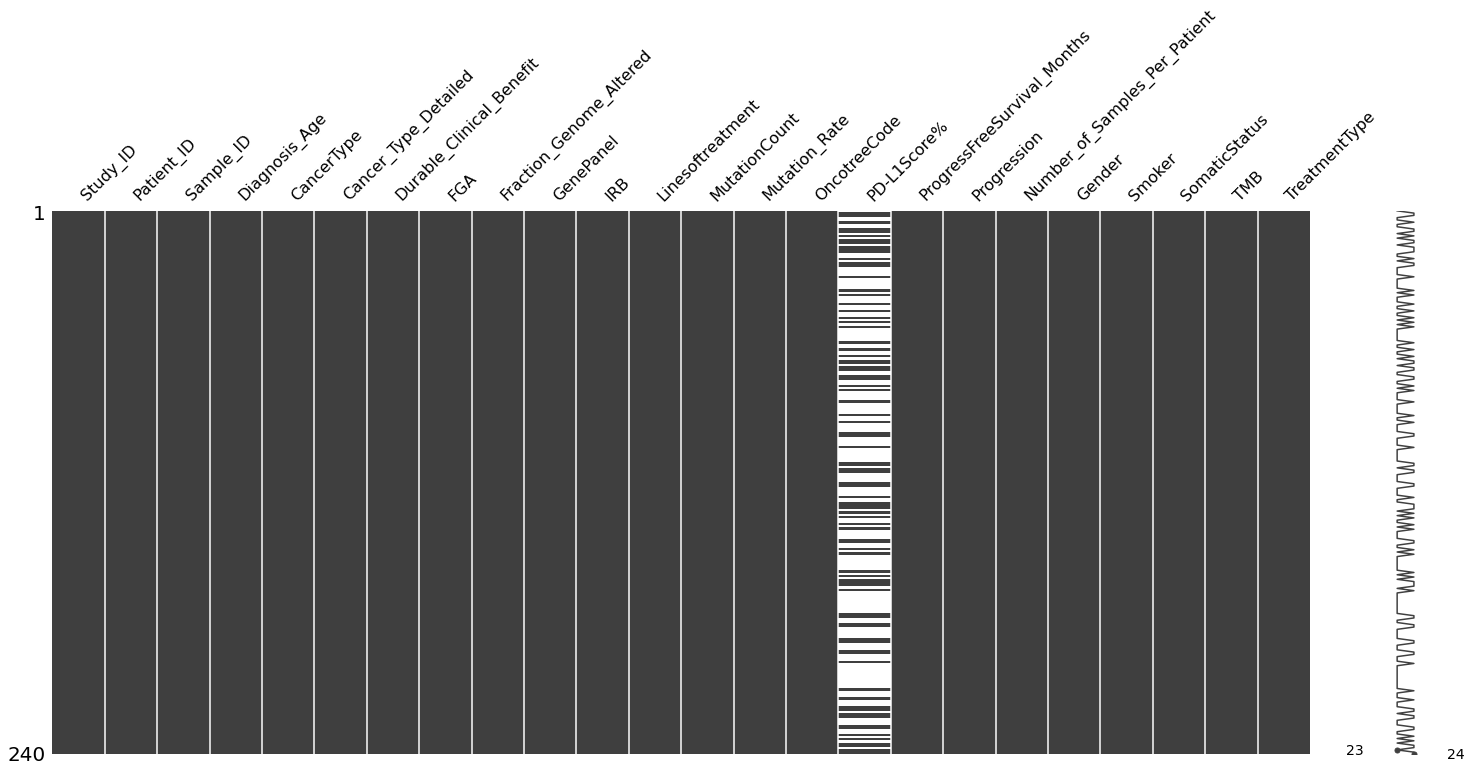

In [ ]:
msno.matrix(df)

In [ ]:
df.drop(df.columns[15], axis=1, inplace=True) #dropping the column with null value in it.

In [ ]:
#removing uneffective columns
df.drop(df.columns[[0,1,2,5,8,13,17]], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis_Age                240 non-null    int64  
 1   CancerType                   240 non-null    int64  
 2   Durable_Clinical_Benefit     240 non-null    int64  
 3   FGA                          240 non-null    float64
 4   GenePanel                    240 non-null    int64  
 5   IRB                          240 non-null    int64  
 6   Linesoftreatment             240 non-null    int64  
 7   MutationCount                240 non-null    int64  
 8   OncotreeCode                 240 non-null    int64  
 9   ProgressFreeSurvival_Months  240 non-null    int64  
 10  Progression                  240 non-null    int64  
 11  Gender                       240 non-null    int64  
 12  Smoker                       240 non-null    int64  
 13  SomaticStatus       

In [ ]:
label_encoder = preprocessing.LabelEncoder()

cols = ['Diagnosis_Age','CancerType','Durable_Clinical_Benefit','IRB','GenePanel','OncotreeCode','ProgressFreeSurvival_Months','Progression','Gender','Smoker','SomaticStatus','TMB','TreatmentType']
# sklearn labelencoder
df[cols] = df[cols].apply(preprocessing.LabelEncoder().fit_transform)

In [ ]:
df.head()

,Diagnosis_Age,CancerType,Durable_Clinical_Benefit,FGA,GenePanel,IRB,Linesoftreatment,MutationCount,OncotreeCode,ProgressFreeSurvival_Months,Progression,Gender,Smoker,SomaticStatus,TMB,TreatmentType
0,22,0,2,0.18,0,0,1,30,0,154,0,0,0,0,58,0
1,24,0,2,0.36,0,0,4,1,0,134,1,1,0,0,2,1
2,32,0,1,0.12,0,0,1,2,0,67,1,0,0,0,5,1
3,41,0,1,0.24,0,1,3,8,2,2,1,1,0,0,23,1
4,30,0,1,0.01,0,0,2,7,1,23,1,1,0,0,19,0


In [ ]:
df.groupby(['Durable_Clinical_Benefit'])['Durable_Clinical_Benefit'].count()

Durable_Clinical_Benefit
0     13
1    158
2     69
Name: Durable_Clinical_Benefit, dtype: int64

#---------------------------------
**Dividing the dataset for RESPONDER vs NONRESPONDER patients**
#---------------------------------

In [ ]:
responder = df[(df['Durable_Clinical_Benefit'] == 2 )]
responder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 230
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis_Age                69 non-null     int64  
 1   CancerType                   69 non-null     int64  
 2   Durable_Clinical_Benefit     69 non-null     int64  
 3   FGA                          69 non-null     float64
 4   GenePanel                    69 non-null     int64  
 5   IRB                          69 non-null     int64  
 6   Linesoftreatment             69 non-null     int64  
 7   MutationCount                69 non-null     int64  
 8   OncotreeCode                 69 non-null     int64  
 9   ProgressFreeSurvival_Months  69 non-null     int64  
 10  Progression                  69 non-null     int64  
 11  Gender                       69 non-null     int64  
 12  Smoker                       69 non-null     int64  
 13  SomaticStatus        

In [ ]:
nonResponder = df[(df['Durable_Clinical_Benefit'] == 1 )]
nonResponder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 2 to 238
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis_Age                158 non-null    int64  
 1   CancerType                   158 non-null    int64  
 2   Durable_Clinical_Benefit     158 non-null    int64  
 3   FGA                          158 non-null    float64
 4   GenePanel                    158 non-null    int64  
 5   IRB                          158 non-null    int64  
 6   Linesoftreatment             158 non-null    int64  
 7   MutationCount                158 non-null    int64  
 8   OncotreeCode                 158 non-null    int64  
 9   ProgressFreeSurvival_Months  158 non-null    int64  
 10  Progression                  158 non-null    int64  
 11  Gender                       158 non-null    int64  
 12  Smoker                       158 non-null    int64  
 13  SomaticStatus       

#-----------------
#-----------------
#-----------------

#------------------------------------------
Calculating partial correlation.

In [ ]:
 trial = pg.partial_corr(data=responder, x='IRB', y='Progression', covar='Durable_Clinical_Benefit', method='spearman')
 trial

/usr/local/lib/python3.9/dist-packages/pingouin/correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
/usr/local/lib/python3.9/dist-packages/pingouin/correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix


,n,r,CI95%,p-val
spearman,69,-0.321729,"[-0.52, -0.09]",0.007464


#-------------------------

# Responder

In [ ]:
responderCorr = pg.pairwise_corr(responder, method='spearman', alternative='greater', padjust='bonf').round(3)
responderCorr = responderCorr.iloc[:, [0,1,4,5]]
responderCorr.rename(columns = {'X':'Node1', 'Y':'Node2','n':'n1', 
                              'r':'r1', 'p-unc':'p-value1'}, inplace = True)
responderCorr

,Node1,Node2,n1,r1
0,Diagnosis_Age,FGA,69,-0.051
1,Diagnosis_Age,GenePanel,69,0.040
2,Diagnosis_Age,IRB,69,0.067
3,Diagnosis_Age,Linesoftreatment,69,0.104
4,Diagnosis_Age,MutationCount,69,-0.155
...,...,...,...,...
73,Gender,TMB,69,-0.099
74,Gender,TreatmentType,69,-0.040
75,Smoker,TMB,69,-0.422
76,Smoker,TreatmentType,69,-0.195


## **Non Responder**

In [ ]:
nonResponderCorr = pg.pairwise_corr(nonResponder, method='spearman', alternative='greater', padjust='bonf').round(3)
nonResponderCorr = nonResponderCorr.iloc[:, [0,1,4,5]]
nonResponderCorr.rename(columns = {'X':'Node1', 'Y':'Node2','n':'n2',
                              'r':'r2', 'p-unc':'p-value2'}, inplace = True)
nonResponderCorr

,Node1,Node2,n2,r2
0,Diagnosis_Age,FGA,158,-0.058
1,Diagnosis_Age,GenePanel,158,0.113
2,Diagnosis_Age,IRB,158,0.125
3,Diagnosis_Age,Linesoftreatment,158,-0.038
4,Diagnosis_Age,MutationCount,158,0.111
...,...,...,...,...
61,Gender,TMB,158,0.015
62,Gender,TreatmentType,158,0.000
63,Smoker,TMB,158,-0.359
64,Smoker,TreatmentType,158,-0.023


In [ ]:
#We are about to merge two different network to an unique one so that we have a broad vision
# n1 & n2 are the number of sample and r1 and r2 are the correlation of the responder and non responder group respectively
merged = responderCorr.merge(nonResponderCorr)

In [ ]:
merged

,Node1,Node2,n1,r1,n2,r2
0,Diagnosis_Age,FGA,69,-0.051,158,-0.058
1,Diagnosis_Age,GenePanel,69,0.040,158,0.113
2,Diagnosis_Age,IRB,69,0.067,158,0.125
3,Diagnosis_Age,Linesoftreatment,69,0.104,158,-0.038
4,Diagnosis_Age,MutationCount,69,-0.155,158,0.111
...,...,...,...,...,...,...
61,Gender,TMB,69,-0.099,158,0.015
62,Gender,TreatmentType,69,-0.040,158,0.000
63,Smoker,TMB,69,-0.422,158,-0.359
64,Smoker,TreatmentType,69,-0.195,158,-0.023


In [ ]:
# here we are about to declare the functions for calculating the fisher z transformation and 
# then Z score respectively
def fisherZtrans(r):
    z = 0.5*(np.log((1 + r) / (1 - r)))
    return (z).round(2)

def zScore(z1,z2,n1,n2):
  standerdError = math.sqrt((1/(n1-3)) + (1/(n2-3)))
  Z = (z1-z2) / standerdError
  return Z
    

In [ ]:
merged['z1']= fisherZtrans(merged['r1'])
merged['z2']= fisherZtrans(merged['r2'])
merged['Z-score'] = zScore(merged['z1'], merged['z2'], merged['n1'].mean(),merged['n2'].mean())

In [ ]:
merged

,Node1,Node2,n1,r1,n2,r2,z1,z2,Z-score
0,Diagnosis_Age,FGA,69,-0.051,158,-0.058,-0.05,-0.06,0.068036
1,Diagnosis_Age,GenePanel,69,0.040,158,0.113,0.04,0.11,-0.476255
2,Diagnosis_Age,IRB,69,0.067,158,0.125,0.07,0.13,-0.408219
3,Diagnosis_Age,Linesoftreatment,69,0.104,158,-0.038,0.10,-0.04,0.952510
4,Diagnosis_Age,MutationCount,69,-0.155,158,0.111,-0.16,0.11,-1.836984
...,...,...,...,...,...,...,...,...,...
61,Gender,TMB,69,-0.099,158,0.015,-0.10,0.02,-0.816437
62,Gender,TreatmentType,69,-0.040,158,0.000,-0.04,0.00,-0.272146
63,Smoker,TMB,69,-0.422,158,-0.359,-0.45,-0.38,-0.476255
64,Smoker,TreatmentType,69,-0.195,158,-0.023,-0.20,-0.02,-1.224656


In [ ]:
merged['p-val'] = scipy.stats.norm.sf(abs(merged['Z-score']))
merged

,Node1,Node2,n1,r1,n2,r2,z1,z2,Z-score,p-val
0,Diagnosis_Age,FGA,69,-0.051,158,-0.058,-0.05,-0.06,0.068036,0.472878
1,Diagnosis_Age,GenePanel,69,0.040,158,0.113,0.04,0.11,-0.476255,0.316946
2,Diagnosis_Age,IRB,69,0.067,158,0.125,0.07,0.13,-0.408219,0.341557
3,Diagnosis_Age,Linesoftreatment,69,0.104,158,-0.038,0.10,-0.04,0.952510,0.170419
4,Diagnosis_Age,MutationCount,69,-0.155,158,0.111,-0.16,0.11,-1.836984,0.033106
...,...,...,...,...,...,...,...,...,...,...
61,Gender,TMB,69,-0.099,158,0.015,-0.10,0.02,-0.816437,0.207125
62,Gender,TreatmentType,69,-0.040,158,0.000,-0.04,0.00,-0.272146,0.392755
63,Smoker,TMB,69,-0.422,158,-0.359,-0.45,-0.38,-0.476255,0.316946
64,Smoker,TreatmentType,69,-0.195,158,-0.023,-0.20,-0.02,-1.224656,0.110352


In [ ]:
diffNet = merged[merged['p-val'] < 0.05] 
diffNet

,Node1,Node2,n1,r1,n2,r2,z1,z2,Z-score,p-val
4,Diagnosis_Age,MutationCount,69,-0.155,158,0.111,-0.16,0.11,-1.836984,0.033106
5,Diagnosis_Age,OncotreeCode,69,-0.232,158,0.081,-0.24,0.08,-2.177167,0.014734
8,Diagnosis_Age,Smoker,69,0.111,158,-0.206,0.11,-0.21,2.177167,0.014734
9,Diagnosis_Age,TMB,69,-0.158,158,0.106,-0.16,0.11,-1.836984,0.033106
18,FGA,Smoker,69,-0.285,158,0.011,-0.29,0.01,-2.041094,0.020621
22,GenePanel,Linesoftreatment,69,0.070,158,-0.238,0.07,-0.24,2.109130,0.017467
30,IRB,Linesoftreatment,69,0.580,158,0.264,0.66,0.27,2.653422,0.003984
34,IRB,Gender,69,-0.267,158,0.017,-0.27,0.02,-1.973057,0.024245
44,Linesoftreatment,TreatmentType,69,0.458,158,0.210,0.49,0.21,1.905021,0.028389
59,ProgressFreeSurvival_Months,TreatmentType,69,-0.320,158,-0.040,-0.33,-0.04,-1.973057,0.024245


In [ ]:
diffNet = merged[merged['p-val'] < 0.05] 
diffNet.drop(diffNet.columns[[2,3,4,5,6,7]], axis=1, inplace=True)

<ipython-input-94-1a5fde736eaf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diffNet.drop(diffNet.columns[[2,3,4,5,6,7]], axis=1, inplace=True)


In [ ]:
diffNet

,Node1,Node2,Z-score,p-val
4,Diagnosis_Age,MutationCount,-1.836984,0.033106
5,Diagnosis_Age,OncotreeCode,-2.177167,0.014734
8,Diagnosis_Age,Smoker,2.177167,0.014734
9,Diagnosis_Age,TMB,-1.836984,0.033106
18,FGA,Smoker,-2.041094,0.020621
22,GenePanel,Linesoftreatment,2.109130,0.017467
30,IRB,Linesoftreatment,2.653422,0.003984
34,IRB,Gender,-1.973057,0.024245
44,Linesoftreatment,TreatmentType,1.905021,0.028389
59,ProgressFreeSurvival_Months,TreatmentType,-1.973057,0.024245


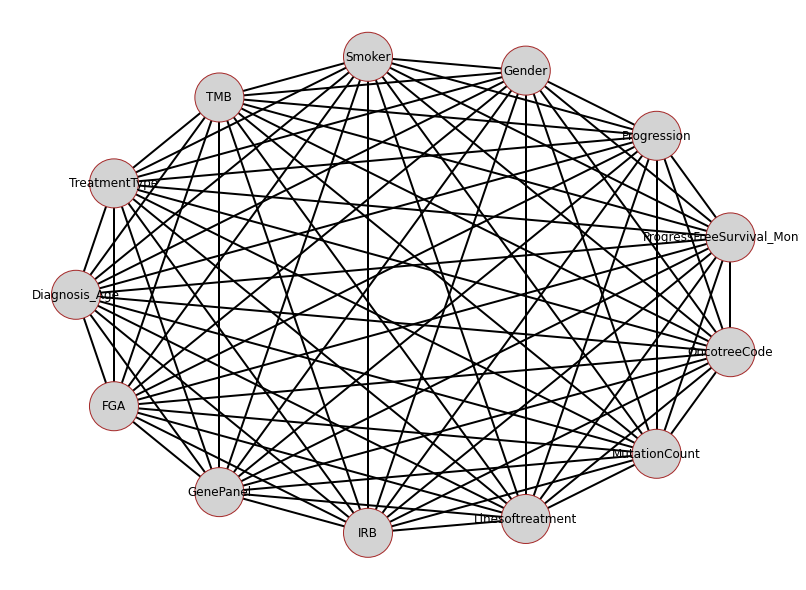

In [ ]:
G1 = nx.Graph()
G1 = nx.from_pandas_edgelist(responderCorr, 'Node1', 'Node2', 'corr' )
d1 = dict(G1.degree)
figure(figsize=(11, 8))
nx.draw_shell(G1, with_labels=True,width=2 ,
              node_color='lightgray',edgecolors='brown',
              nodelist=d1.keys(), node_size=[v * 200 for v in d1.values()] )

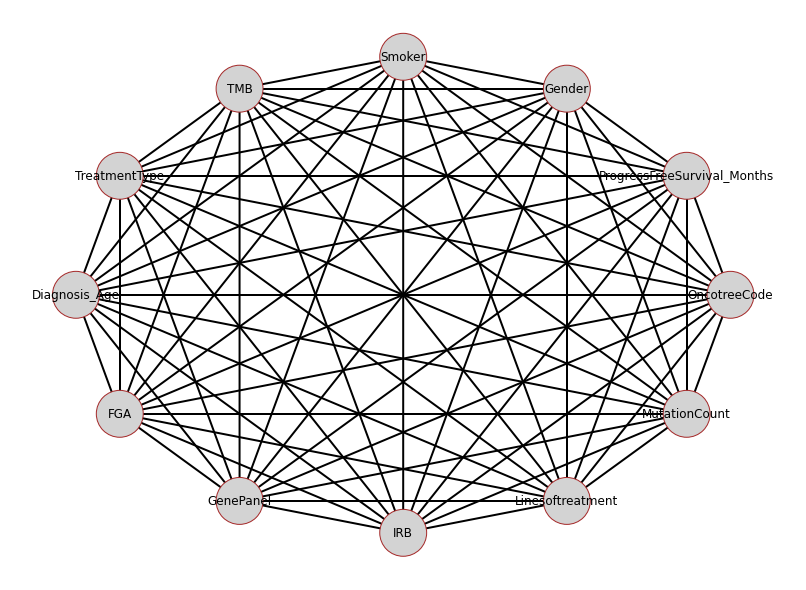

In [ ]:
G2 = nx.Graph()
G2 = nx.from_pandas_edgelist(nonResponderCorr, 'Node1', 'Node2' , 'corr')
d2 = dict(G2.degree)
figure(figsize=(11, 8))
nx.draw_shell(G2, with_labels=True,width=2 ,
              node_color='lightgray',edgecolors='brown',
              nodelist=d2.keys(), node_size=[v * 200 for v in d2.values()] )